In [5]:
# ==================== EXTRACT DATASET.ZIP ====================
import zipfile
import os

# Path to your zip file
zip_path = '/content/archive.zip'
extract_path = '/content/dataset'

# Check if zip file exists
if os.path.exists(zip_path):
    print(f'Found {zip_path}')
    print(f'Extracting to {extract_path}...')

    # Extract the zip file
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_path)

    print('Extraction complete!')

    # Verify the structure
    print(f'\nContents of {extract_path}:')
    for item in os.listdir(extract_path):
        item_path = os.path.join(extract_path, item)
        if os.path.isdir(item_path):
            print(f'  📁 {item}/')
            # Show subdirectories
            for subitem in os.listdir(item_path):
                print(f'    📁 {subitem}/')
        else:
            print(f'  📄 {item}')

    # Count images in each class
    train_confident = len(os.listdir(f'{extract_path}/confident-unconfident/train/confident'))
    train_unconfident = len(os.listdir(f'{extract_path}/confident-unconfident/train/unconfident'))
    test_confident = len(os.listdir(f'{extract_path}/confident-unconfident/test/confident'))
    test_unconfident = len(os.listdir(f'{extract_path}/confident-unconfident/test/unconfident'))

    print(f'\n📊 Dataset Summary:')
    print(f'Train - Confident: {train_confident} images')
    print(f'Train - Unconfident: {train_unconfident} images')
    print(f'Test - Confident: {test_confident} images')
    print(f'Test - Unconfident: {test_unconfident} images')
    print(f'Total: {train_confident + train_unconfident + test_confident + test_unconfident} images')

else:
    print(f'❌ Error: {zip_path} not found!')
    print('Available files in /content/:')
    print(os.listdir('/content/'))

Found /content/archive.zip
Extracting to /content/dataset...
Extraction complete!

Contents of /content/dataset:
  📁 confident-unconfident/
    📁 train/
    📁 test/

📊 Dataset Summary:
Train - Confident: 12179 images
Train - Unconfident: 16528 images
Test - Confident: 3007 images
Test - Unconfident: 4171 images
Total: 35885 images


In [8]:
shutil.move('/content/dataset/confident-unconfident/train', '/content/dataset/train')

'/content/dataset/train'

In [1]:
!pip install ultralytics albumentations opencv-python scikit-learn -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 49.9 MB/s eta 0:00:00


In [2]:
from ultralytics import YOLO
import albumentations as A
from sklearn.metrics import classification_report, confusion_matrix, f1_score, precision_score, recall_score
import seaborn as sns
import os
import zipfile
import shutil
import random
from pathlib import Path
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tqdm import tqdm

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


GPU Status:
GPU 0: Tesla T4 (UUID: GPU-e71503cf-307e-e538-14ee-1501b73f80c1)

STEP 1: EXTRACTING DATASET
❌ Error: /content/dataset.zip not found!

STEP 2: IMAGE PREPROCESSING

🔄 Preprocessing images (CLAHE + Denoising + Sharpening)...

Processing train/confident: 12179 images


train/confident: 100%|██████████| 12179/12179 [01:02<00:00, 195.98it/s]


✓ Successfully preprocessed: 12179/12179 images

Processing train/unconfident: 16528 images


train/unconfident: 100%|██████████| 16528/16528 [01:21<00:00, 203.96it/s]


✓ Successfully preprocessed: 16528/16528 images

Processing test/confident: 3007 images


test/confident: 100%|██████████| 3007/3007 [00:14<00:00, 206.03it/s]


✓ Successfully preprocessed: 3007/3007 images

Processing test/unconfident: 4171 images


test/unconfident: 100%|██████████| 4171/4171 [00:19<00:00, 211.96it/s]
/tmp/ipython-input-1748504069.py:150: UserWarning: Argument(s) 'value' are not valid for transform Rotate
  A.Rotate(limit=15, border_mode=cv2.BORDER_CONSTANT, value=0, p=0.4),
/tmp/ipython-input-1748504069.py:151: UserWarning: Argument(s) 'var_limit' are not valid for transform GaussNoise
  A.GaussNoise(var_limit=(10.0, 30.0), p=0.3),


✓ Successfully preprocessed: 4171/4171 images

✓ Preprocessing complete!

STEP 3: HANDLING CLASS IMBALANCE WITH AUGMENTATION

Original counts:
  Confident: 12179
  Unconfident: 16528
  Imbalance ratio: 1.36:1
Generating 1869 augmented images...


Augmenting: 100%|██████████| 1869/1869 [00:05<00:00, 323.47it/s]



✓ Augmentation complete!
  New confident count: 14048
  New imbalance ratio: 1.18:1

🔄 Creating validation split...
  confident: 601 validation images
  unconfident: 834 validation images

STEP 4: TRAINING YOLOV8 CLASSIFICATION MODEL

Training Configuration:
  Model: YOLOv8s-cls
  Image size: 224x224
  Epochs: 100 (with early stopping)
  Optimizer: AdamW
  Loss: Weighted classification loss
Ultralytics 8.3.209 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=1.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/dataset_preprocessed, degrees=15, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=True, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=

confident: 100%|██████████| 3007/3007 [00:15<00:00, 195.85it/s]



Predicting unconfident: 4171 images


unconfident: 100%|██████████| 4171/4171 [00:22<00:00, 182.55it/s]



CLASSIFICATION REPORT
              precision    recall  f1-score   support

   confident     0.8434    0.8367    0.8401      3007
 unconfident     0.8830    0.8880    0.8855      4171

    accuracy                         0.8665      7178
   macro avg     0.8632    0.8624    0.8628      7178
weighted avg     0.8664    0.8665    0.8665      7178


📈 Overall Metrics:
  Weighted Precision: 0.8664
  Weighted Recall: 0.8665
  Weighted F1 Score: 0.8665
  Average Confidence: 0.9156


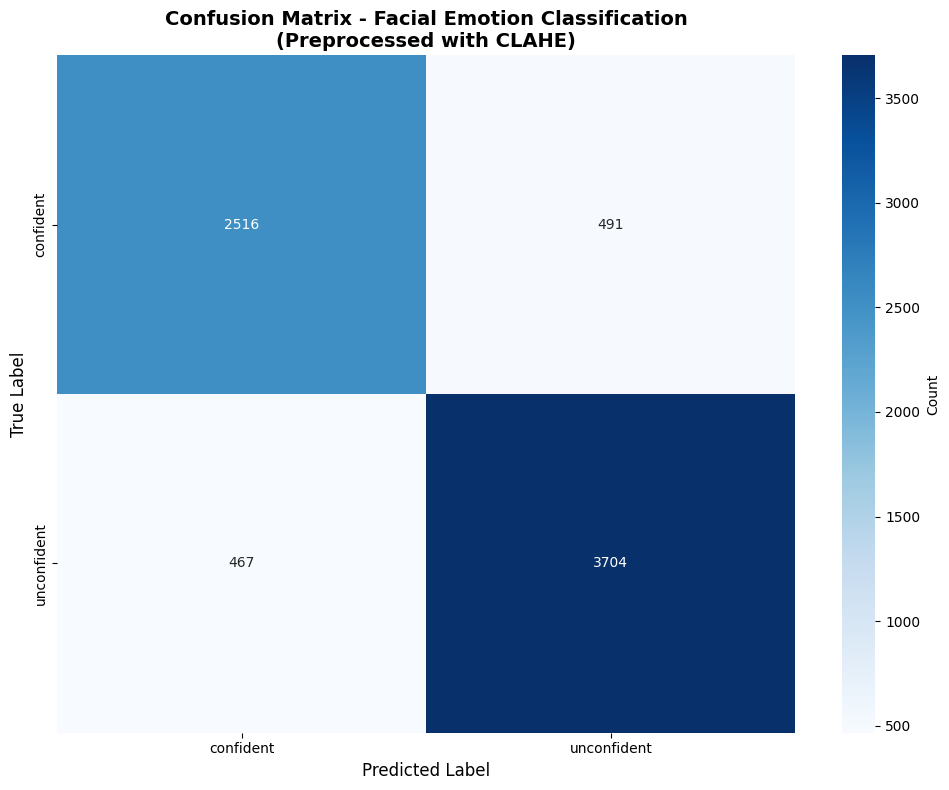


📊 Per-Class Accuracy:
  confident: 0.8367
  unconfident: 0.8880

STEP 7: SAMPLE PREDICTIONS VISUALIZATION


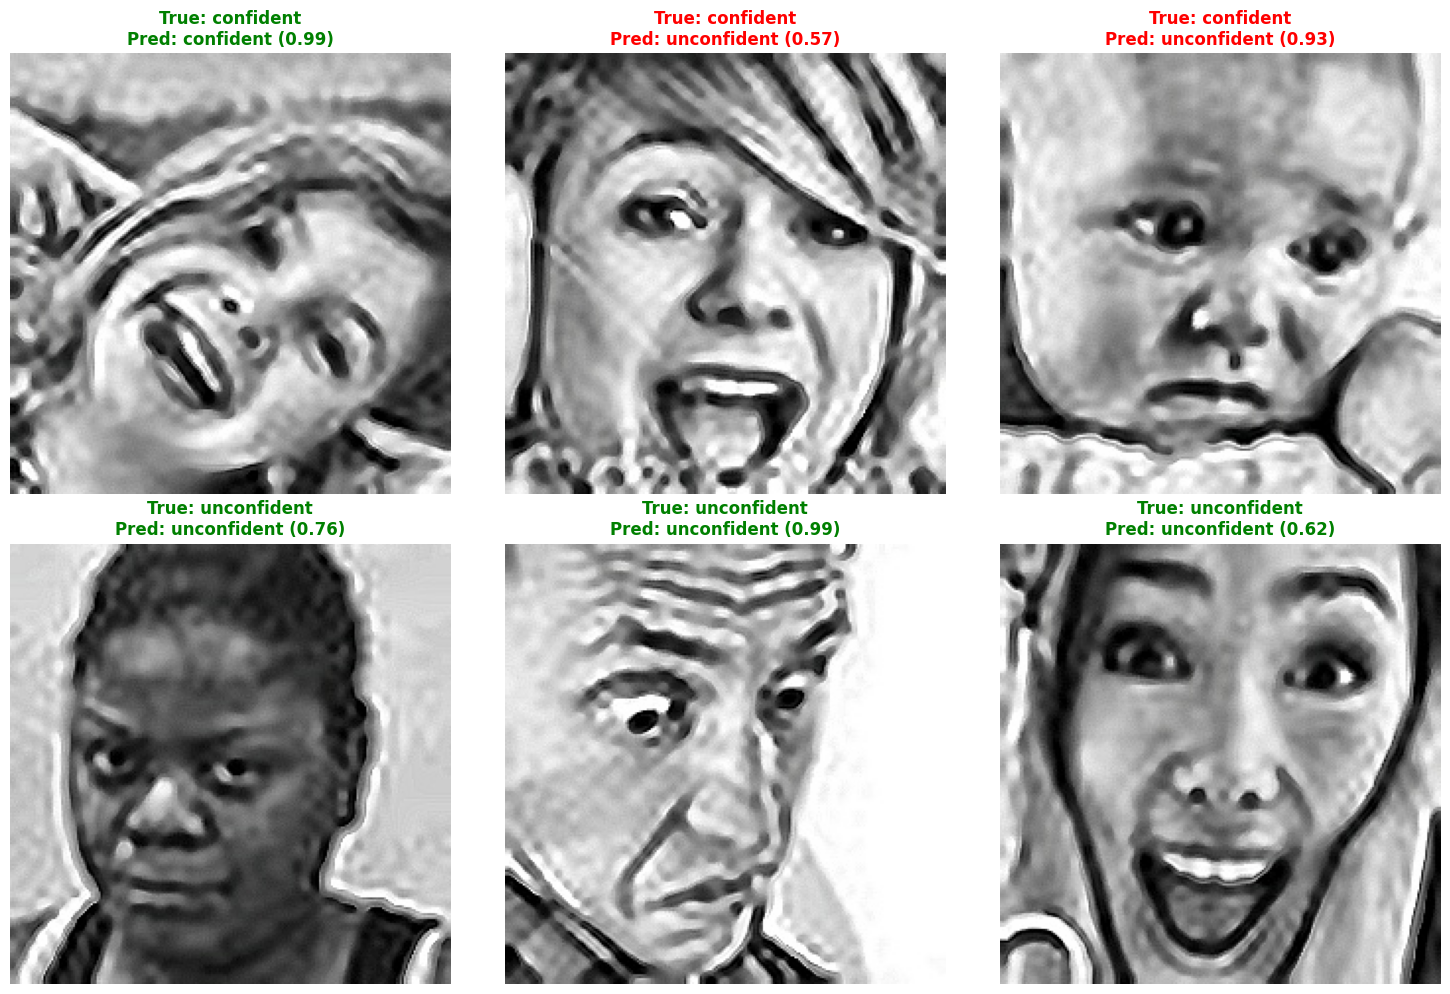


STEP 8: SAVING RESULTS
✓ Results saved to results_summary.txt

📦 Exporting model to ONNX format...
Ultralytics 8.3.209 🚀 Python-3.12.11 torch-2.8.0+cu126 CPU (Intel Xeon CPU @ 2.00GHz)
💡 ProTip: Export to OpenVINO format for best performance on Intel hardware. Learn more at https://docs.ultralytics.com/integrations/openvino/

PyTorch: starting from 'runs/classify/facial_emotion/weights/best.pt' with input shape (1, 3, 224, 224) BCHW and output shape(s) (1, 2) (9.8 MB)
requirements: Ultralytics requirements ['onnx>=1.12.0', 'onnxslim>=0.1.71', 'onnxruntime-gpu'] not found, attempting AutoUpdate...

requirements: AutoUpdate success ✅ 6.3s
WARNING ⚠️ requirements: Restart runtime or rerun command for updates to take effect


ONNX: starting export with onnx 1.19.1 opset 22...
ONNX: slimming with onnxslim 0.1.71...
ONNX: export success ✅ 9.2s, saved as 'runs/classify/facial_emotion/weights/best.onnx' (19.4 MB)

Export complete (9.4s)
Results saved to /content/runs/classify/facial_emotion/w

In [9]:
# ==================== COMPLETE YOLOV8 FACIAL CLASSIFICATION WITH PREPROCESSING ====================
# Binary classification: confident vs unconfident
# Includes: ZIP extraction, preprocessing (CLAHE, face detection, augmentation), training, testing



# Install required packages




# Check GPU
print("GPU Status:")
!nvidia-smi -L

# ==================== STEP 1: EXTRACT DATASET ====================
print("\n" + "="*70)
print("STEP 1: EXTRACTING DATASET")
print("="*70)

zip_path = '/content/dataset.zip'
extract_path = '/content/dataset'

if os.path.exists(zip_path):
    print(f'✓ Found {zip_path}')
    print(f'Extracting to {extract_path}...')

    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_path)

    print('✓ Extraction complete!')

    # Count original images
    train_confident = len([f for f in os.listdir(f'{extract_path}/train/confident') if f.endswith(('.jpg', '.jpeg', '.png'))])
    train_unconfident = len([f for f in os.listdir(f'{extract_path}/train/unconfident') if f.endswith(('.jpg', '.jpeg', '.png'))])
    test_confident = len([f for f in os.listdir(f'{extract_path}/test/confident') if f.endswith(('.jpg', '.jpeg', '.png'))])
    test_unconfident = len([f for f in os.listdir(f'{extract_path}/test/unconfident') if f.endswith(('.jpg', '.jpeg', '.png'))])

    print(f'\n📊 Original Dataset Summary:')
    print(f'Train - Confident: {train_confident} | Unconfident: {train_unconfident}')
    print(f'Test - Confident: {test_confident} | Unconfident: {test_unconfident}')
    print(f'Class Imbalance Ratio: {train_unconfident/train_confident:.2f}:1')
else:
    print(f'❌ Error: {zip_path} not found!')

# ==================== STEP 2: PREPROCESSING ====================
print("\n" + "="*70)
print("STEP 2: IMAGE PREPROCESSING")
print("="*70)

# Create preprocessed dataset directory
preprocessed_path = '/content/dataset_preprocessed'
os.makedirs(f'{preprocessed_path}/train/confident', exist_ok=True)
os.makedirs(f'{preprocessed_path}/train/unconfident', exist_ok=True)
os.makedirs(f'{preprocessed_path}/test/confident', exist_ok=True)
os.makedirs(f'{preprocessed_path}/test/unconfident', exist_ok=True)

def preprocess_image(img_path, output_path):
    """
    Preprocessing pipeline: CLAHE + Noise Reduction + Normalization
    Optimized for facial emotion recognition
    """
    # Read image
    img = cv2.imread(img_path)
    if img is None:
        return False

    # Convert to RGB
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # 1. Resize to standard size while preserving aspect ratio
    target_size = 224
    h, w = img_rgb.shape[:2]
    if h > w:
        new_h, new_w = target_size, int(w * target_size / h)
    else:
        new_h, new_w = int(h * target_size / w), target_size

    img_resized = cv2.resize(img_rgb, (new_w, new_h), interpolation=cv2.INTER_LANCZOS4)

    # Add padding to make square
    delta_w = target_size - new_w
    delta_h = target_size - new_h
    top, bottom = delta_h // 2, delta_h - (delta_h // 2)
    left, right = delta_w // 2, delta_w - (delta_w // 2)
    img_padded = cv2.copyMakeBorder(img_resized, top, bottom, left, right,
                                     cv2.BORDER_CONSTANT, value=[0, 0, 0])

    # 2. Apply CLAHE (Contrast Limited Adaptive Histogram Equalization) per channel
    # Enhances local contrast, improves feature visibility
    lab = cv2.cvtColor(img_padded, cv2.COLOR_RGB2LAB)
    l, a, b = cv2.split(lab)

    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    l_clahe = clahe.apply(l)

    img_clahe = cv2.merge([l_clahe, a, b])
    img_clahe = cv2.cvtColor(img_clahe, cv2.COLOR_LAB2RGB)

    # 3. Noise reduction using Bilateral Filter
    # Preserves edges while smoothing noise
    img_denoised = cv2.bilateralFilter(img_clahe, d=5, sigmaColor=50, sigmaSpace=50)

    # 4. Slight sharpening to enhance facial features
    kernel_sharpen = np.array([[-1, -1, -1],
                                [-1,  9, -1],
                                [-1, -1, -1]]) / 1
    img_sharpened = cv2.filter2D(img_denoised, -1, kernel_sharpen)

    # Save preprocessed image
    cv2.imwrite(output_path, cv2.cvtColor(img_sharpened, cv2.COLOR_RGB2BGR))
    return True

# Preprocess all images
print("\n🔄 Preprocessing images (CLAHE + Denoising + Sharpening)...")

splits = ['train', 'test']
classes = ['confident', 'unconfident']

for split in splits:
    for class_name in classes:
        input_dir = f'{extract_path}/{split}/{class_name}'
        output_dir = f'{preprocessed_path}/{split}/{class_name}'

        image_files = [f for f in os.listdir(input_dir) if f.endswith(('.jpg', '.jpeg', '.png'))]

        print(f'\nProcessing {split}/{class_name}: {len(image_files)} images')

        success_count = 0
        for img_file in tqdm(image_files, desc=f'{split}/{class_name}'):
            input_path = os.path.join(input_dir, img_file)
            output_path = os.path.join(output_dir, img_file)

            if preprocess_image(input_path, output_path):
                success_count += 1

        print(f'✓ Successfully preprocessed: {success_count}/{len(image_files)} images')

print('\n✓ Preprocessing complete!')

# ==================== STEP 3: HANDLE CLASS IMBALANCE ====================
print("\n" + "="*70)
print("STEP 3: HANDLING CLASS IMBALANCE WITH AUGMENTATION")
print("="*70)

# Define augmentation pipeline for minority class
augmentation_pipeline = A.Compose([
    A.HorizontalFlip(p=0.5),
    A.RandomBrightnessContrast(brightness_limit=0.2, contrast_limit=0.2, p=0.5),
    A.Rotate(limit=15, border_mode=cv2.BORDER_CONSTANT, value=0, p=0.4),
    A.GaussNoise(var_limit=(10.0, 30.0), p=0.3),
    A.RandomScale(scale_limit=0.1, p=0.3),
    A.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1, p=0.3),
    A.Sharpen(alpha=(0.2, 0.5), lightness=(0.5, 1.0), p=0.2),
])

def augment_images(class_dir, target_count, current_count):
    """Generate augmented images for minority class"""
    images = [f for f in os.listdir(class_dir) if f.endswith(('.jpg', '.jpeg', '.png'))]
    needed = target_count - current_count

    print(f'Generating {needed} augmented images...')

    for i in tqdm(range(needed), desc='Augmenting'):
        # Random image selection
        img_name = random.choice(images)
        img_path = os.path.join(class_dir, img_name)

        # Read and augment
        image = cv2.imread(img_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        augmented = augmentation_pipeline(image=image)['image']

        # Save with unique name
        aug_name = f'aug_{i:05d}_{img_name}'
        aug_path = os.path.join(class_dir, aug_name)
        cv2.imwrite(aug_path, cv2.cvtColor(augmented, cv2.COLOR_RGB2BGR))

    return len(os.listdir(class_dir))

# Calculate class counts
confident_dir = f'{preprocessed_path}/train/confident'
unconfident_dir = f'{preprocessed_path}/train/unconfident'

confident_count = len([f for f in os.listdir(confident_dir) if f.endswith(('.jpg', '.jpeg', '.png'))])
unconfident_count = len([f for f in os.listdir(unconfident_dir) if f.endswith(('.jpg', '.jpeg', '.png'))])

print(f'\nOriginal counts:')
print(f'  Confident: {confident_count}')
print(f'  Unconfident: {unconfident_count}')
print(f'  Imbalance ratio: {unconfident_count/confident_count:.2f}:1')

# Augment minority class to 85% of majority class
target_confident = int(unconfident_count * 0.85)

if confident_count < target_confident:
    final_count = augment_images(confident_dir, target_confident, confident_count)
    print(f'\n✓ Augmentation complete!')
    print(f'  New confident count: {final_count}')
    print(f'  New imbalance ratio: {unconfident_count/final_count:.2f}:1')
else:
    print('Classes already balanced!')

# Create validation split from test
print("\n🔄 Creating validation split...")
val_dir = f'{preprocessed_path}/val'
os.makedirs(f'{val_dir}/confident', exist_ok=True)
os.makedirs(f'{val_dir}/unconfident', exist_ok=True)

for class_name in ['confident', 'unconfident']:
    test_class_dir = f'{preprocessed_path}/test/{class_name}'
    val_class_dir = f'{val_dir}/{class_name}'

    images = [f for f in os.listdir(test_class_dir) if f.endswith(('.jpg', '.jpeg', '.png'))]
    random.shuffle(images)

    val_count = int(len(images) * 0.2)
    val_images = images[:val_count]

    for img in val_images:
        shutil.copy2(f'{test_class_dir}/{img}', f'{val_class_dir}/{img}')

    print(f'  {class_name}: {len(val_images)} validation images')

# ==================== STEP 4: TRAIN YOLOV8 MODEL ====================
print("\n" + "="*70)
print("STEP 4: TRAINING YOLOV8 CLASSIFICATION MODEL")
print("="*70)

# Initialize YOLOv8s-cls (small model for balanced precision/F1)
model = YOLO('yolov8s-cls.pt')

print('\nTraining Configuration:')
print('  Model: YOLOv8s-cls')
print('  Image size: 224x224')
print('  Epochs: 100 (with early stopping)')
print('  Optimizer: AdamW')
print('  Loss: Weighted classification loss')

# Train the model
results = model.train(
    data=preprocessed_path,
    epochs=100,
    imgsz=224,
    batch=16,
    patience=15,
    save=True,
    device=0,
    workers=4,
    optimizer='AdamW',
    lr0=0.001,
    lrf=0.01,
    momentum=0.937,
    weight_decay=0.0005,
    warmup_epochs=3,
    warmup_momentum=0.8,
    cls=1.5,  # Increased classification loss weight for imbalance
    hsv_h=0.015,
    hsv_s=0.7,
    hsv_v=0.4,
    degrees=15,
    translate=0.1,
    scale=0.2,
    fliplr=0.5,
    mosaic=0.0,
    mixup=0.1,
    project='runs/classify',
    name='facial_emotion',
    exist_ok=True,
    pretrained=True,
    verbose=True,
)

print('\n✓ Training complete!')

# ==================== STEP 5: EVALUATE ON TEST SET ====================
print("\n" + "="*70)
print("STEP 5: MODEL EVALUATION AND TESTING")
print("="*70)

# Load best model
best_model = YOLO('runs/classify/facial_emotion/weights/best.pt')

print('\n📊 Validating on test set...')
metrics = best_model.val(data=preprocessed_path, split='test')

print(f'\n✓ Validation Metrics:')
print(f'  Top-1 Accuracy: {metrics.top1:.4f}')
print(f'  Top-5 Accuracy: {metrics.top5:.4f}')

# ==================== STEP 6: DETAILED METRICS (PRECISION, RECALL, F1) ====================
print("\n" + "="*70)
print("STEP 6: CALCULATING DETAILED METRICS")
print("="*70)

def calculate_detailed_metrics(model, test_dir, class_names):
    """Calculate precision, recall, F1 per class"""
    y_true = []
    y_pred = []
    y_conf = []

    for class_idx, class_name in enumerate(class_names):
        class_dir = os.path.join(test_dir, class_name)
        images = [f for f in os.listdir(class_dir) if f.endswith(('.jpg', '.jpeg', '.png'))]

        print(f'\nPredicting {class_name}: {len(images)} images')

        for img in tqdm(images, desc=class_name):
            img_path = os.path.join(class_dir, img)
            results = model.predict(img_path, verbose=False)

            pred_class = results[0].probs.top1
            confidence = results[0].probs.top1conf.item()

            y_true.append(class_idx)
            y_pred.append(pred_class)
            y_conf.append(confidence)

    return np.array(y_true), np.array(y_pred), np.array(y_conf)

# Calculate predictions
class_names = ['confident', 'unconfident']
test_dir = f'{preprocessed_path}/test'

y_true, y_pred, y_conf = calculate_detailed_metrics(best_model, test_dir, class_names)

# Classification report
print('\n' + '='*70)
print('CLASSIFICATION REPORT')
print('='*70)
print(classification_report(y_true, y_pred, target_names=class_names, digits=4))

# Calculate metrics
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f'\n📈 Overall Metrics:')
print(f'  Weighted Precision: {precision:.4f}')
print(f'  Weighted Recall: {recall:.4f}')
print(f'  Weighted F1 Score: {f1:.4f}')
print(f'  Average Confidence: {y_conf.mean():.4f}')

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names,
            cbar_kws={'label': 'Count'})
plt.title('Confusion Matrix - Facial Emotion Classification\n(Preprocessed with CLAHE)',
          fontsize=14, fontweight='bold')
plt.ylabel('True Label', fontsize=12)
plt.xlabel('Predicted Label', fontsize=12)
plt.tight_layout()
plt.savefig('confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

# Per-class accuracy
print(f'\n📊 Per-Class Accuracy:')
for i, class_name in enumerate(class_names):
    mask = y_true == i
    class_acc = (y_pred[mask] == i).sum() / mask.sum()
    print(f'  {class_name}: {class_acc:.4f}')

# ==================== STEP 7: VISUALIZE SAMPLE PREDICTIONS ====================
print("\n" + "="*70)
print("STEP 7: SAMPLE PREDICTIONS VISUALIZATION")
print("="*70)

def visualize_predictions(model, test_dir, class_names, num_samples=6):
    """Visualize sample predictions"""
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    axes = axes.flatten()

    sample_count = 0
    for class_idx, class_name in enumerate(class_names):
        class_dir = os.path.join(test_dir, class_name)
        images = [f for f in os.listdir(class_dir) if f.endswith(('.jpg', '.jpeg', '.png'))]

        samples = random.sample(images, min(3, len(images)))

        for img_name in samples:
            if sample_count >= 6:
                break

            img_path = os.path.join(class_dir, img_name)
            img = cv2.imread(img_path)
            img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

            results = model.predict(img_path, verbose=False)
            pred_class = results[0].probs.top1
            confidence = results[0].probs.top1conf.item()
            pred_name = class_names[pred_class]

            color = 'green' if pred_class == class_idx else 'red'

            axes[sample_count].imshow(img_rgb)
            axes[sample_count].set_title(
                f'True: {class_name}\nPred: {pred_name} ({confidence:.2f})',
                color=color, fontweight='bold'
            )
            axes[sample_count].axis('off')
            sample_count += 1

    plt.tight_layout()
    plt.savefig('sample_predictions.png', dpi=300, bbox_inches='tight')
    plt.show()

visualize_predictions(best_model, test_dir, class_names)

# ==================== STEP 8: SAVE RESULTS ====================
print("\n" + "="*70)
print("STEP 8: SAVING RESULTS")
print("="*70)

# Save detailed results
with open('results_summary.txt', 'w') as f:
    f.write('='*70 + '\n')
    f.write('FACIAL EMOTION CLASSIFICATION RESULTS\n')
    f.write('Binary Classification: Confident vs Unconfident\n')
    f.write('='*70 + '\n\n')

    f.write('PREPROCESSING:\n')
    f.write('  - CLAHE (Contrast Limited Adaptive Histogram Equalization)\n')
    f.write('  - Bilateral Filtering (Noise Reduction)\n')
    f.write('  - Image Sharpening\n')
    f.write('  - Data Augmentation (Minority Class)\n\n')

    f.write('MODEL: YOLOv8s-cls\n\n')

    f.write('TEST SET RESULTS:\n')
    f.write(f'  Top-1 Accuracy: {metrics.top1:.4f}\n')
    f.write(f'  Weighted Precision: {precision:.4f}\n')
    f.write(f'  Weighted Recall: {recall:.4f}\n')
    f.write(f'  Weighted F1 Score: {f1:.4f}\n\n')

    f.write('CLASSIFICATION REPORT:\n')
    f.write(classification_report(y_true, y_pred, target_names=class_names, digits=4))

print('✓ Results saved to results_summary.txt')

# Export model to ONNX
print('\n📦 Exporting model to ONNX format...')
best_model.export(format='onnx')
print('✓ Model exported to ONNX')

print("\n" + "="*70)
print("✅ ALL STEPS COMPLETE!")
print("="*70)
print(f'\n📁 Best model: runs/classify/facial_emotion/weights/best.pt')
print(f'📊 Training plots: runs/classify/facial_emotion/')
print(f'📈 Confusion matrix: confusion_matrix.png')
print(f'🖼️  Sample predictions: sample_predictions.png')
print(f'📝 Results summary: results_summary.txt')
print(f'\n🎯 Final F1 Score: {f1:.4f}')
